# Import Libraries
Import pandas, numpy, matplotlib and seaborn for data analysis and visualization. Use pandas read_csv with gzip compression.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file with gzip compression
file_path = 'data/task_events/part-00000-of-00500.csv.gz'
TASK_COLS = [
    'timestamp', 'missing_info', 'job_id', 'task_index',
    'machine_id', 'event_type', 'user_name', 'scheduling_class',
    'priority', 'cpu_request', 'memory_request', 'disk_request',
    'different_machine_constraint'
]
data = pd.read_csv(file_path, compression='gzip', header=None, names=TASK_COLS)

# Display the first few rows of the dataframe
data.head()

,timestamp,missing_info,job_id,task_index,machine_id,event_type,user_name,scheduling_class,priority,cpu_request,memory_request,disk_request,different_machine_constraint
0,0,2.0,3418309,0,4.155527e+09,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN
1,0,2.0,3418309,1,3.291507e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN
2,0,NaN,3418314,0,3.938719e+09,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,0.125,0.07446,0.000424,0.0
3,0,NaN,3418314,1,3.516186e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,0.125,0.07446,0.000424,0.0
4,0,2.0,3418319,0,4.310529e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN


In [12]:
import pandas as pd

def analyze_timestamp_zeros(file_path, task_cols):
    try:
        data = pd.read_csv(file_path, 
                          compression='gzip',
                          names=task_cols,
                          header=None)
        
        total_rows = len(data)
        zero_timestamp_count = len(data[data['timestamp'] == 0])
        percentage = (zero_timestamp_count / total_rows) * 100
        return total_rows, zero_timestamp_count, percentage
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return 0, 0, 0

# Define column names
task_cols = [
    'timestamp', 'missing_info', 'job_id', 'task_index',
    'machine_id', 'event_type', 'user_name', 'scheduling_class',
    'priority', 'cpu_request', 'memory_request', 'disk_request',
    'different_machine_constraint'
]

# Create list of file paths
file_paths = [f'data/task_events/part-0000{i}-of-00500.csv.gz' for i in range(6)]

# Process each file and store results
print("File Analysis Results:")
print("-" * 70)
print(f"{'File':15} {'Total Rows':>15} {'Zero Timestamps':>15} {'Percentage':>15}")
print("-" * 70)

for file_path in file_paths:
    total, zeros, pct = analyze_timestamp_zeros(file_path, task_cols)
    file_name = file_path.split('/')[-1]
    print(f"{file_name[:15]:15} {total:>15,d} {zeros:>15,d} {pct:>14.2f}%")

File Analysis Results:
----------------------------------------------------------------------
File                 Total Rows Zero Timestamps      Percentage
----------------------------------------------------------------------
part-00000-of-0         450,146         277,321          61.61%
part-00001-of-0          77,776               0           0.00%
part-00002-of-0         160,642               0           0.00%
part-00003-of-0         115,400               0           0.00%
part-00004-of-0         115,555               0           0.00%
part-00005-of-0         167,471               0           0.00%


# Load and Preview Data
Load the gzipped CSV file with specified column names, display first few rows and check data types of columns.

In [2]:
# Display the first few rows of the dataframe
data.head()

# Check the data types of the columns
data.dtypes

timestamp                         int64
missing_info                    float64
job_id                            int64
task_index                        int64
machine_id                      float64
event_type                        int64
user_name                        object
scheduling_class                  int64
priority                          int64
cpu_request                     float64
memory_request                  float64
disk_request                    float64
different_machine_constraint    float64
dtype: object

# Basic Data Info
Display basic information about the dataset including missing values, data types, and summary statistics.

In [3]:
# Display basic information about the dataset including missing values, data types, and summary statistics

# Display basic information about the dataframe
data.info()

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display summary statistics of the dataframe
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450146 entries, 0 to 450145
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   timestamp                     450146 non-null  int64  
 1   missing_info                  291 non-null     float64
 2   job_id                        450146 non-null  int64  
 3   task_index                    450146 non-null  int64  
 4   machine_id                    330581 non-null  float64
 5   event_type                    450146 non-null  int64  
 6   user_name                     450146 non-null  object 
 7   scheduling_class              450146 non-null  int64  
 8   priority                      450146 non-null  int64  
 9   cpu_request                   449855 non-null  float64
 10  memory_request                449855 non-null  float64
 11  disk_request                  449855 non-null  float64
 12  different_machine_constraint  449855 non-nul

,timestamp,missing_info,job_id,task_index,machine_id,event_type,user_name,scheduling_class,priority,cpu_request,memory_request,disk_request,different_machine_constraint
count,4.501460e+05,291.0,4.501460e+05,450146.000000,3.305810e+05,450146.000000,450146,450146.000000,450146.000000,449855.000000,449855.000000,449855.000000,449855.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,519,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,fJYeclskJqPWsAT6TX/r9X5OiIZpSEb2PBGliYAOMxM=,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,119644,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.086289e+09,2.0,5.663903e+09,1611.971583,1.308649e+09,0.946106,NaN,0.939320,3.316142,0.044100,0.036062,0.000333,0.415176
std,1.603681e+09,0.0,1.293134e+09,3522.704892,1.764162e+09,1.302828,NaN,1.115504,3.655484,0.047539,0.038031,0.000401,0.492753
min,0.000000e+00,2.0,3.418309e+06,0.000000,5.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,2.0,5.844817e+09,80.000000,7.712404e+06,0.000000,NaN,0.000000,0.000000,0.015620,0.015530,0.000070,0.000000
50%,0.000000e+00,2.0,6.225100e+09,390.000000,3.291685e+08,1.000000,NaN,0.000000,2.000000,0.024990,0.025450,0.000386,0.000000
75%,2.149857e+09,2.0,6.251724e+09,1114.000000,2.343402e+09,1.000000,NaN,2.000000,9.000000,0.062500,0.038210,0.000386,1.000000


# Analyze Event Types
Create visualizations to show distribution of event types and their relationship with other variables.

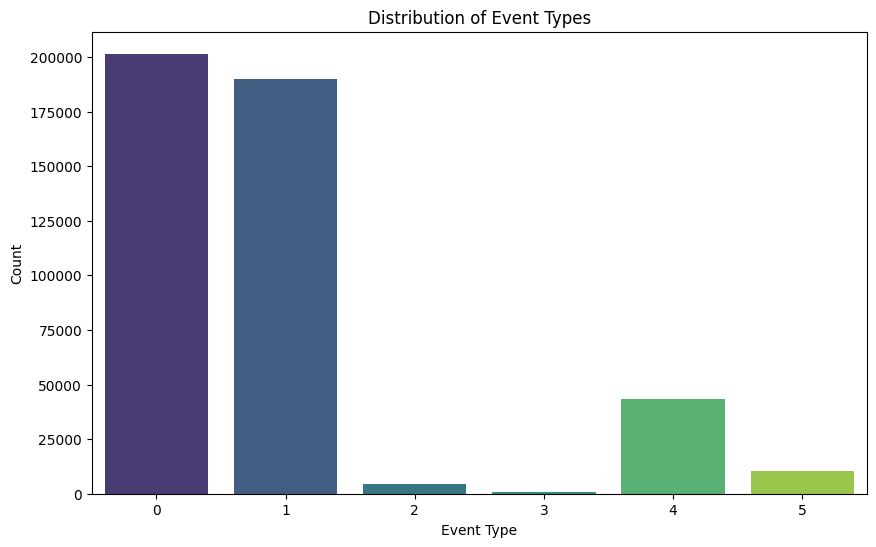

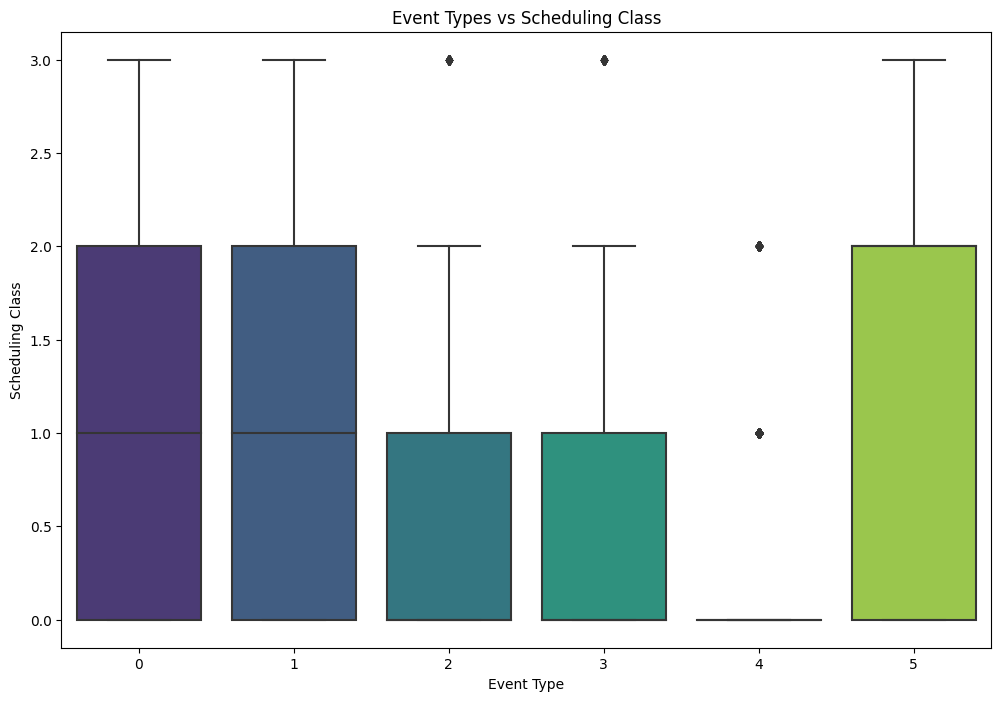

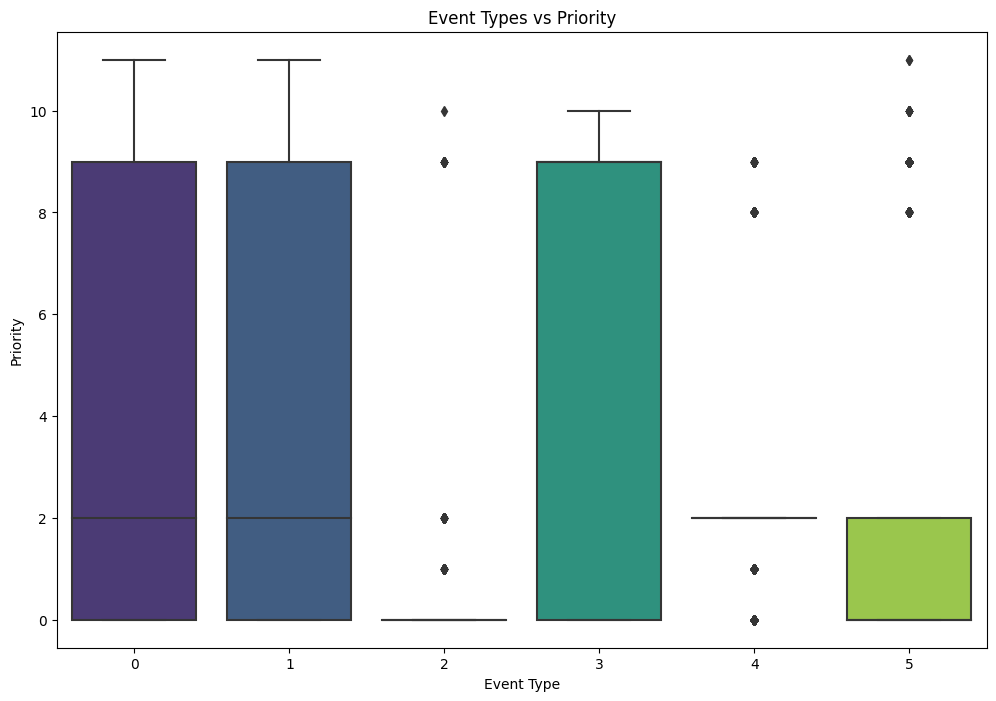

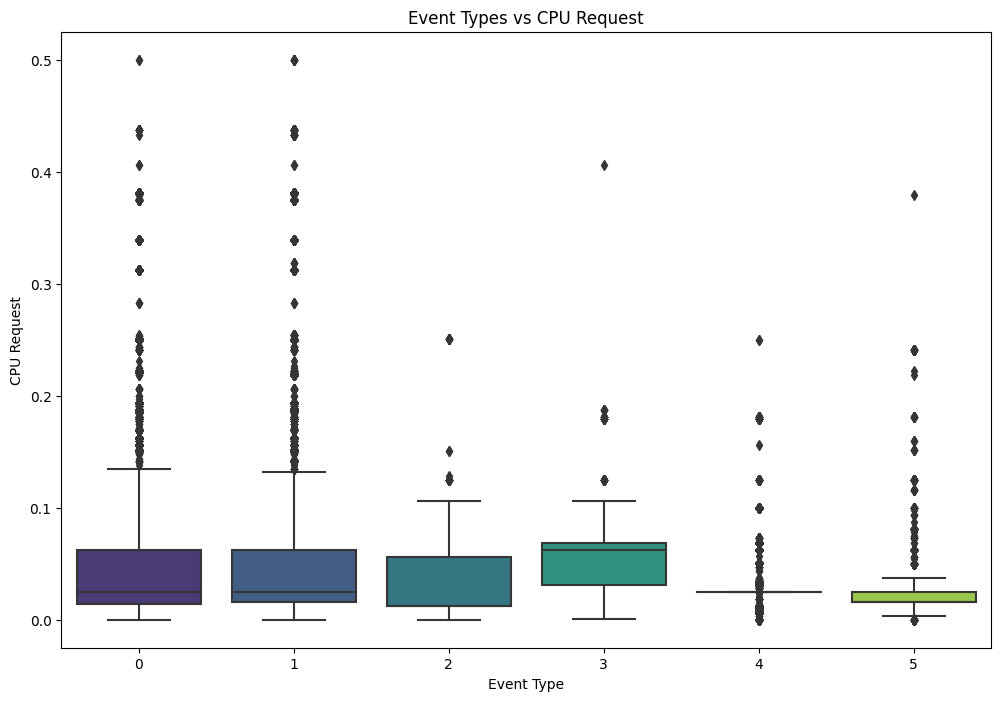

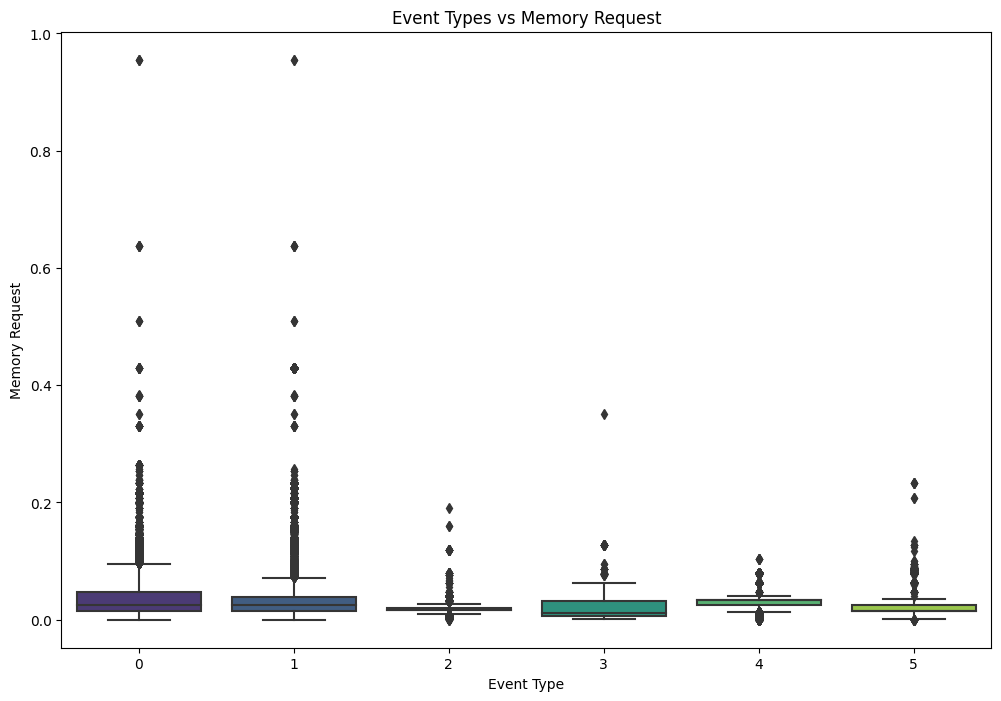

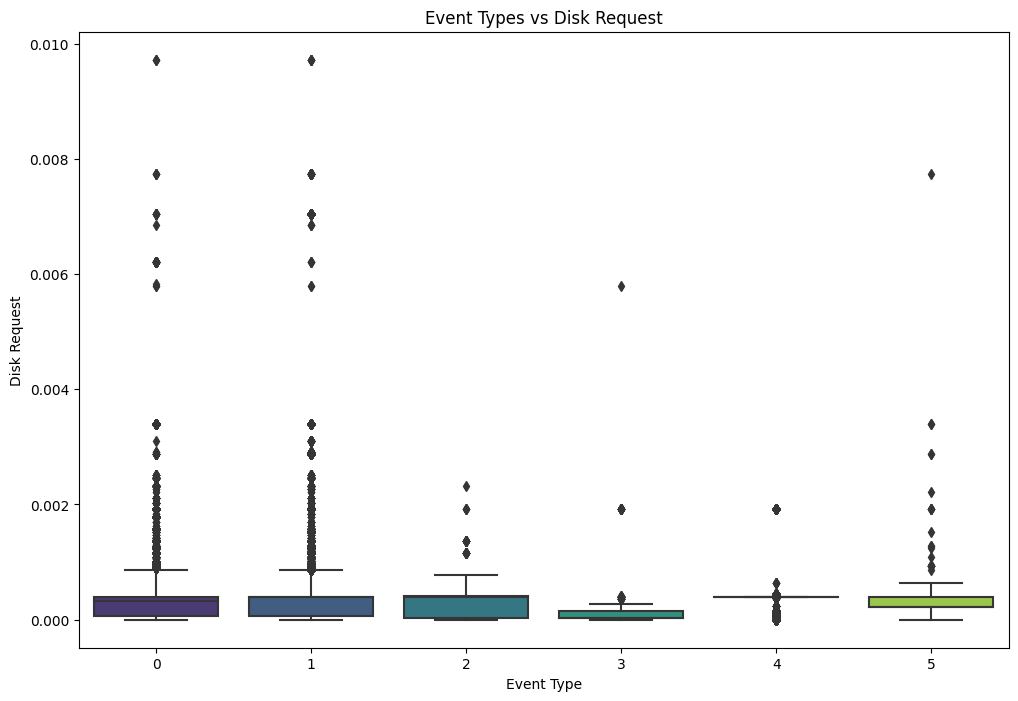

In [4]:
# Analyze Event Types

# Count the occurrences of each event type
event_type_counts = data['event_type'].value_counts()

# Plot the distribution of event types
plt.figure(figsize=(10, 6))
sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between event types and scheduling class
plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='scheduling_class', data=data, palette='viridis')
plt.title('Event Types vs Scheduling Class')
plt.xlabel('Event Type')
plt.ylabel('Scheduling Class')
plt.show()

# Analyze the relationship between event types and priority
plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='priority', data=data, palette='viridis')
plt.title('Event Types vs Priority')
plt.xlabel('Event Type')
plt.ylabel('Priority')
plt.show()

# Analyze the relationship between event types and CPU request
plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='cpu_request', data=data, palette='viridis')
plt.title('Event Types vs CPU Request')
plt.xlabel('Event Type')
plt.ylabel('CPU Request')
plt.show()

# Analyze the relationship between event types and memory request
plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='memory_request', data=data, palette='viridis')
plt.title('Event Types vs Memory Request')
plt.xlabel('Event Type')
plt.ylabel('Memory Request')
plt.show()

# Analyze the relationship between event types and disk request
plt.figure(figsize=(12, 8))
sns.boxplot(x='event_type', y='disk_request', data=data, palette='viridis')
plt.title('Event Types vs Disk Request')
plt.xlabel('Event Type')
plt.ylabel('Disk Request')
plt.show()

# Resource Requests Analysis
Analyze and visualize CPU, memory, and disk requests distribution and their correlations.

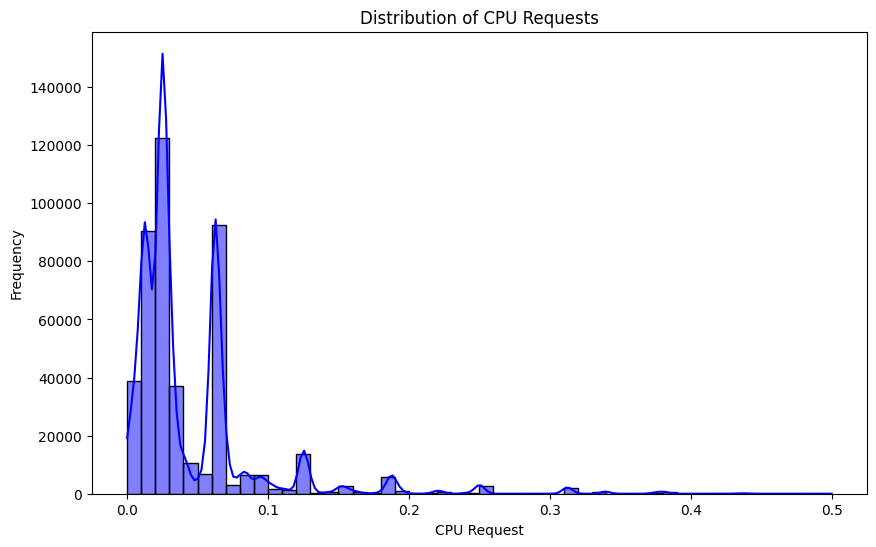

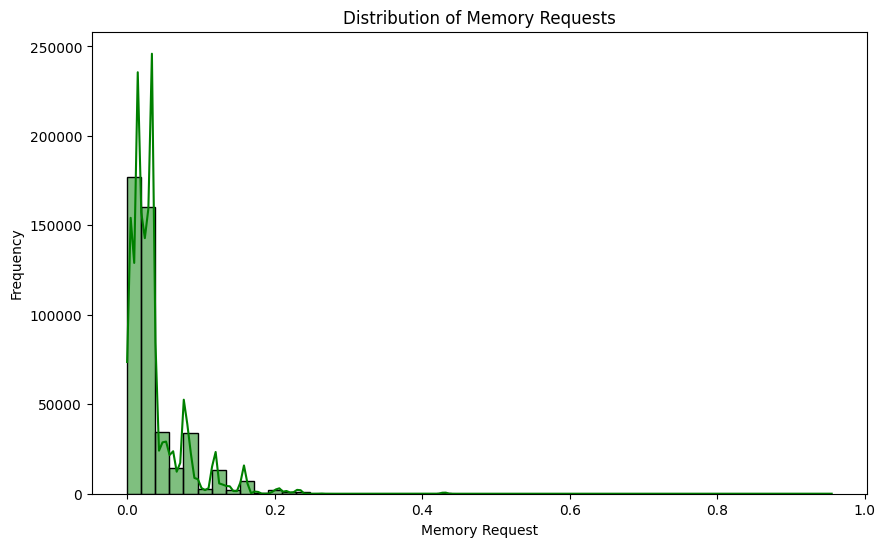

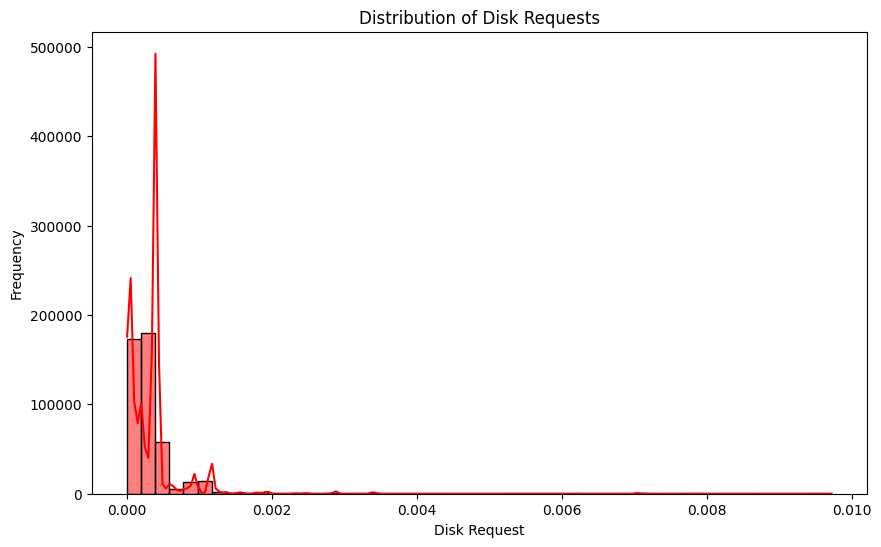

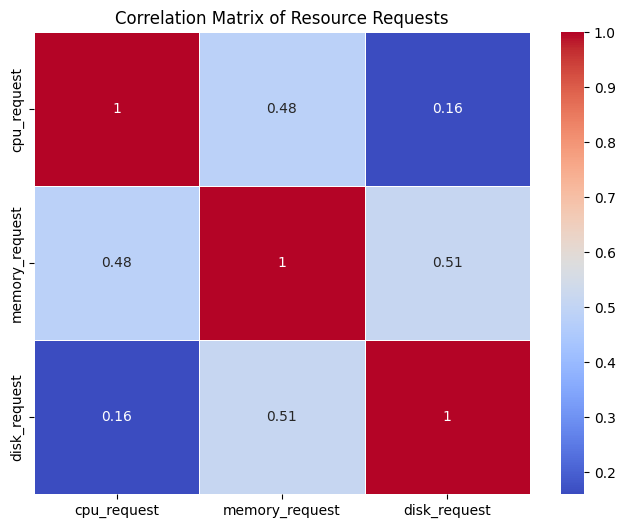

c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` 

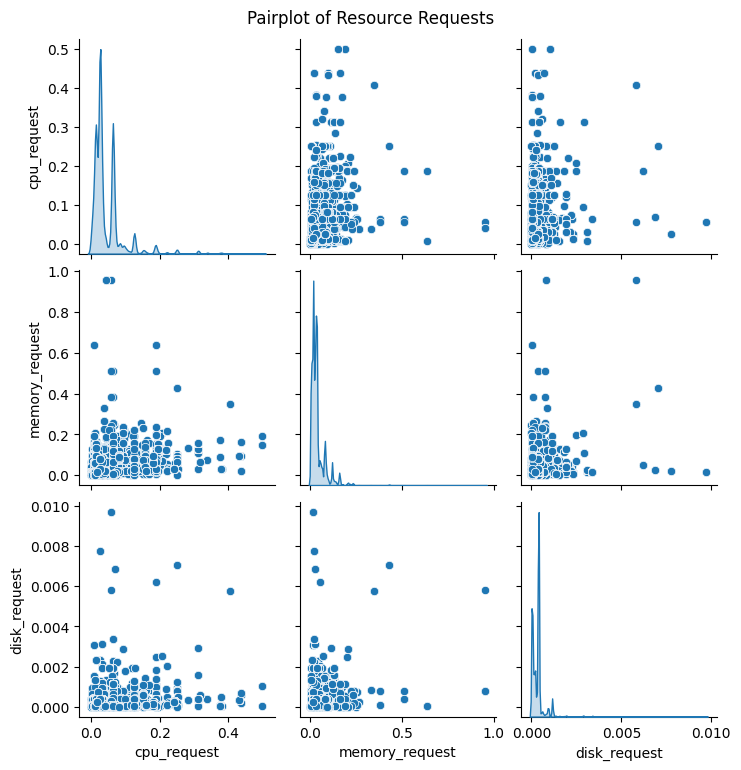

In [5]:
# Resource Requests Analysis

# Plot the distribution of CPU requests
plt.figure(figsize=(10, 6))
sns.histplot(data['cpu_request'], bins=50, kde=True, color='blue')
plt.title('Distribution of CPU Requests')
plt.xlabel('CPU Request')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of memory requests
plt.figure(figsize=(10, 6))
sns.histplot(data['memory_request'], bins=50, kde=True, color='green')
plt.title('Distribution of Memory Requests')
plt.xlabel('Memory Request')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of disk requests
plt.figure(figsize=(10, 6))
sns.histplot(data['disk_request'], bins=50, kde=True, color='red')
plt.title('Distribution of Disk Requests')
plt.xlabel('Disk Request')
plt.ylabel('Frequency')
plt.show()

# Analyze the correlation between CPU, memory, and disk requests
correlation_matrix = data[['cpu_request', 'memory_request', 'disk_request']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Resource Requests')
plt.show()

# Pairplot to visualize the relationships between CPU, memory, and disk requests
sns.pairplot(data[['cpu_request', 'memory_request', 'disk_request']], diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Resource Requests', y=1.02)
plt.show()

# Time Series View
Convert timestamp to datetime and create time series visualizations of task events.

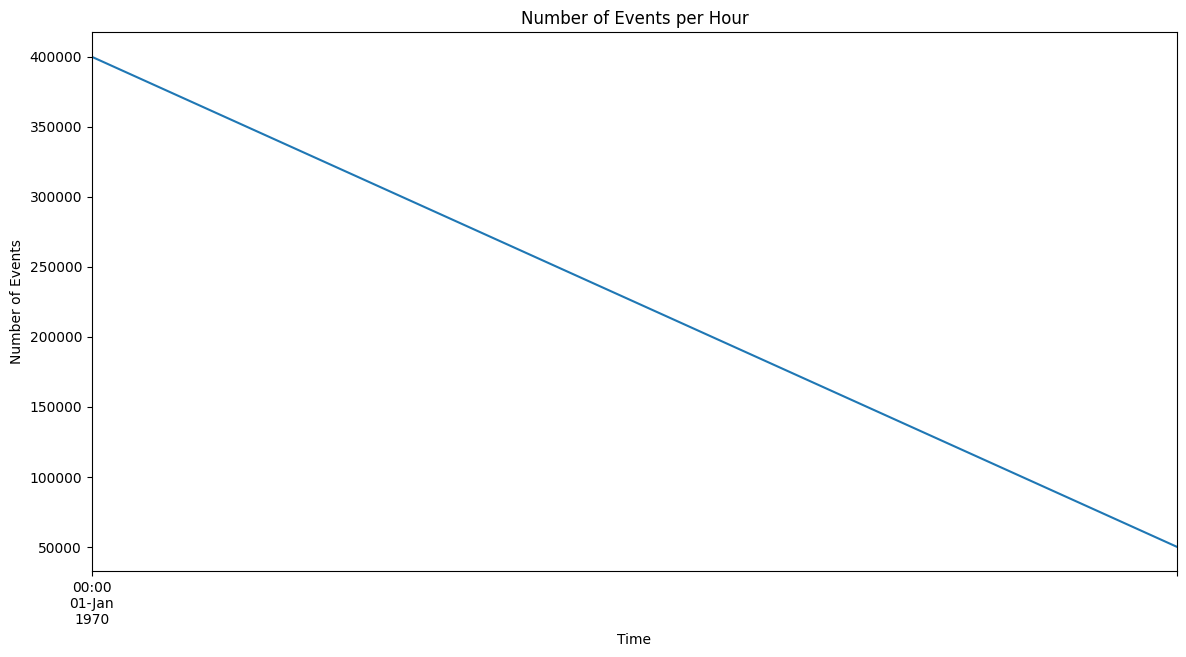

c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


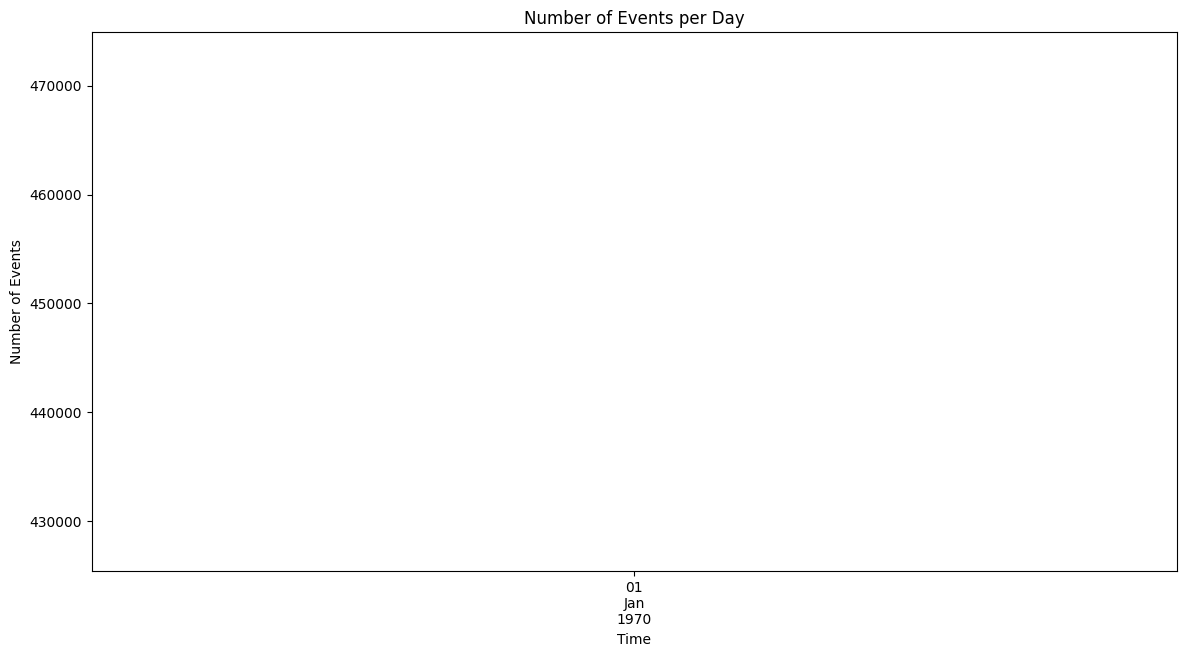

c:\Users\Xu Yinfeng\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


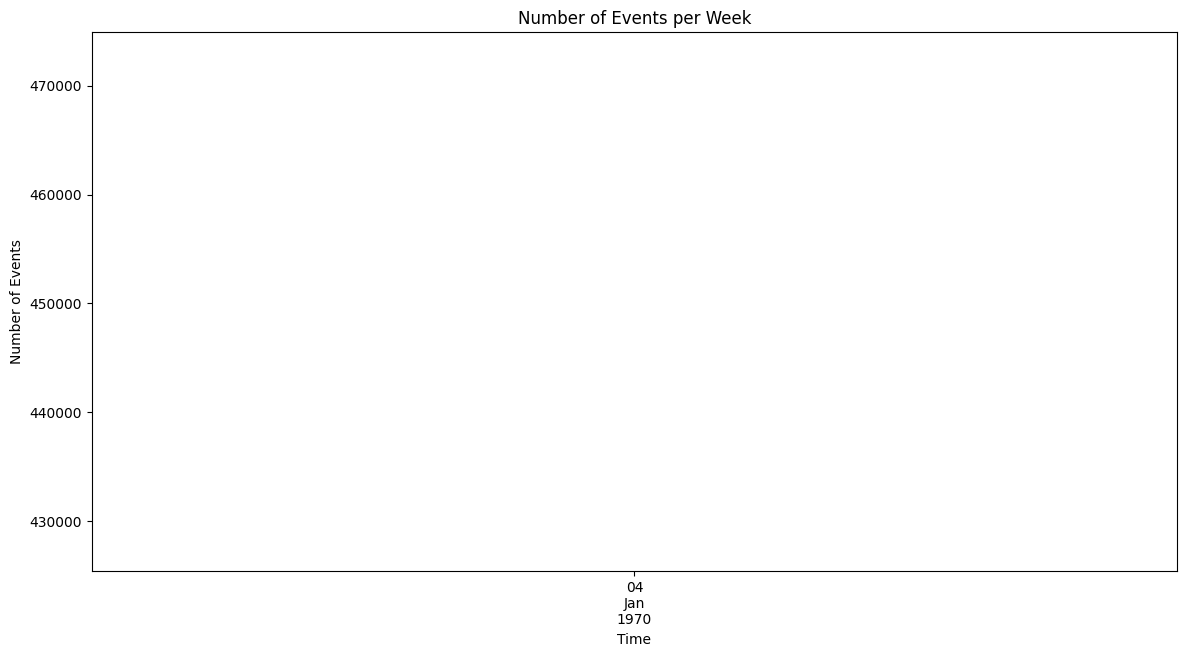

In [6]:
# Time Series View

# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='us')

# Set the timestamp column as the index
data.set_index('timestamp', inplace=True)

# Resample the data to hourly frequency and count the number of events per hour
hourly_events = data['event_type'].resample('H').count()

# Plot the time series of events per hour
plt.figure(figsize=(14, 7))
hourly_events.plot()
plt.title('Number of Events per Hour')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()

# Resample the data to daily frequency and count the number of events per day
daily_events = data['event_type'].resample('D').count()

# Plot the time series of events per day
plt.figure(figsize=(14, 7))
daily_events.plot()
plt.title('Number of Events per Day')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()

# Resample the data to weekly frequency and count the number of events per week
weekly_events = data['event_type'].resample('W').count()

# Plot the time series of events per week
plt.figure(figsize=(14, 7))
weekly_events.plot()
plt.title('Number of Events per Week')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.show()